\newpage

## Question 

Consider the `banknote` dataset from the `mclust` package in R. The dataset can be downloaded from [banknote](https://raw.githubusercontent.com/PratheepaJ/datasets/master/banknote.csv).

You can read the data dictionary for the `banknote` dataset at [Banknote dataset](https://mclust-org.github.io/mclust/reference/banknote.html#format). The data set contains six measurements made on 100 genuine and 100 counterfeit old Swiss 1000-franc banknotes. 

You will uncover patterns in the data using clustering and principal component analysis, but first, you must prepare the dataset.

1. Store the `Status` variable in a separate object. Later, we will compare the outcomes of the unsupervised methods against the actual labels to evaluate their performance.


In [70]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/PratheepaJ/datasets/master/banknote.csv'
banknote_df = pd.read_csv(url)
banknote_df.head()



,Status,Length,Left,Right,Bottom,Top,Diagonal
0,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [71]:
# Store the Status variable in a separate object
status = banknote_df['Status']
print(status.head())

0    genuine
1    genuine
2    genuine
3    genuine
4    genuine
Name: Status, dtype: object


\newpage

2. What are the variables in the dataset?


In [72]:
# Display the variables in the dataset
banknote_df.columns

Index(['Status', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal'], dtype='object')

In [73]:
banknote_df.dtypes

Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

The variables in the dataset are Status, Length, Left, Right, Bottom, Top, and Diagonal. From the data dictionary, we see that the status variable is the status of the banknote (either geniune or counterfeit); the Length variable displays the length of the bill in millimeters (mm); the Left variable indicates the width of the left edge in mm; the Right variable indicates the width of the right edge in mm, the Bottom variable indicates the the bottom margin width in mm; the Top variable indicates the the top margin width in mm; and the Diagonal indicates the the length of the diagonal in mm.

\newpage

3. From the `banknote` dataset, remove the `Status` variable. Ensure that all analyses and tasks going forward are conducted using this modified dataset. 

In [74]:
# Remove the Status variable from the dataset
banknote_df_modified = banknote_df.drop(columns=['Status'])
print(banknote_df_modified.head())

   Length   Left  Right  Bottom   Top  Diagonal
0   214.8  131.0  131.1     9.0   9.7     141.0
1   214.6  129.7  129.7     8.1   9.5     141.7
2   214.8  129.7  129.7     8.7   9.6     142.2
3   214.8  129.7  129.6     7.5  10.4     142.0
4   215.0  129.6  129.7    10.4   7.7     141.8


\newpage

4. Calculate the mean and variance for each variable in the dataset. Which variable has the largest variance? Discuss the implications of this finding for unsupervised learning, particularly how this variable's characteristics might influence the analysis compared to the other variables.

In [75]:
# Calculate the mean for each variable
mean_values = banknote_df_modified.mean()
print("Mean values:\n", mean_values)

Mean values:
 Length      214.8960
Left        130.1215
Right       129.9565
Bottom        9.4175
Top          10.6505
Diagonal    140.4835
dtype: float64


In [76]:
# Calculate the variance for each variable
variance_values = banknote_df_modified.var()
print("Variance values:\n", variance_values)

Variance values:
 Length      0.141793
Left        0.130339
Right       0.163274
Bottom      2.086878
Top         0.644723
Diagonal    1.327716
dtype: float64


In [84]:
# Identify the variable with the largest variance
largest_variance_variable = variance_values.idxmax()
largest_variance_value = variance_values.max()

print(f"The variable with the largest variance is {largest_variance_variable} with a variance of {largest_variance_value}.")

The variable with the largest variance is Bottom with a variance of 2.0868781407035177.


The Bottom variable has the most variance (about 2.087). This indicates that we have a lot of variability for the bottom margin width among the banknotes in the dataset. The implications of having a high variance in a feature variable in unsupervised learning is that this variable may dominate distance-based algorithms. So, the Bottom variable may disproportionately affect our clustering results or PCA, if not normalized or standardized through feature scaling. Thus, this variable's characteristics might lead to bias results. The Bottom feature variable might have more influence in distinguishing between genuine and counterfeit banknotes, due to its high variability.

\newpage

5. Normalize the dataset by centering and scaling all variables. Use this standardized dataset for all subsequent analyses (Questions 6-12).

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
banknote_df_standardized = scaler.fit_transform(banknote_df_modified)

# Convert the standardized data back to a DataFrame
banknote_df_standardized = pd.DataFrame(banknote_df_standardized, 
                                        columns=banknote_df_modified.columns)

print(banknote_df_standardized.head())

     Length      Left     Right    Bottom       Top  Diagonal
0 -0.255583  2.439452  2.837043 -0.289732 -1.186735  0.449372
1 -0.788048 -1.170437 -0.636381 -0.914304 -1.436443  1.058395
2 -0.255583 -1.170437 -0.636381 -0.497923 -1.311589  1.493412
3 -0.255583 -1.170437 -0.884483 -1.330685 -0.312759  1.319405
4  0.276882 -1.448121 -0.636381  0.681824 -3.683811  1.145399


\newpage

6. Using k-means clustering, group the banknotes into clusters. Select a random number of clusters, denoted as $k$, according to your discretion. Set `n_init` to 20 to ensure the algorithm runs with 20 different centroid seeds. After clustering, calculate the average silhouette score for the cluster assignments to evaluate the clustering performance. 

In [52]:
from sklearn.cluster import KMeans

# Set the number of clusters
k = 3  # We can choose any number of clusters

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)

# Fit the algorithm to the standardized data
kmeans.fit(banknote_df_standardized)

# Get the cluster assignments
cluster_labels = kmeans.labels_

print(f"Cluster assignments for k={k}:\n{cluster_labels}")

Cluster assignments for k=3:
[0 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 2 0 2 2 0 0 2 0
 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2
 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [ ]:
# Calculate the average silhouette score
silhouette_avg = silhouette_score(banknote_df_standardized, cluster_labels)

print(f"The average silhouette score for {k} clusters is {silhouette_avg:.4f}")

The average silhouette score for 3 clusters is 0.3278


\newpage

7. Determine the optimal number of clusters, $k$, for the dataset based on the silhouette score distribution. To achieve this, plot the silhouette scores for various values of $k$ (e.g., $k=2, 3, 4$). Based on these plots, select the $k$ that best fits the data. Provide two reasons supporting your choice of $k$. 

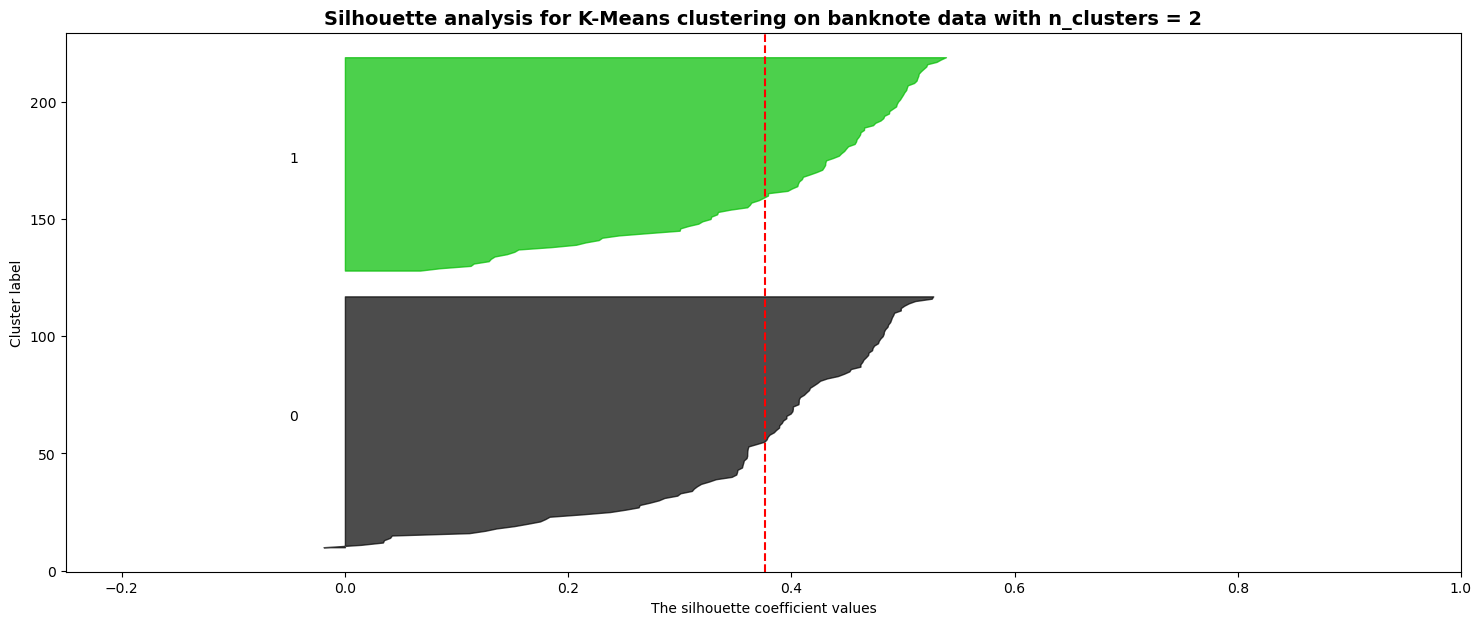

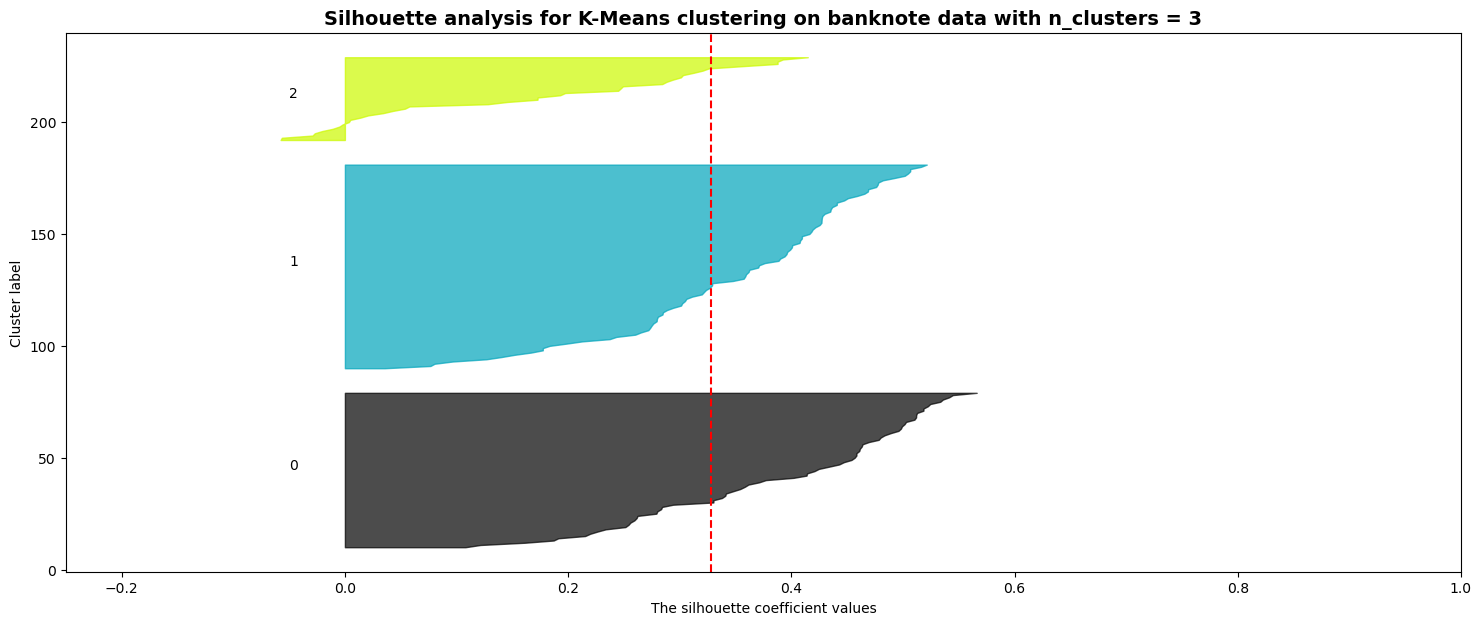

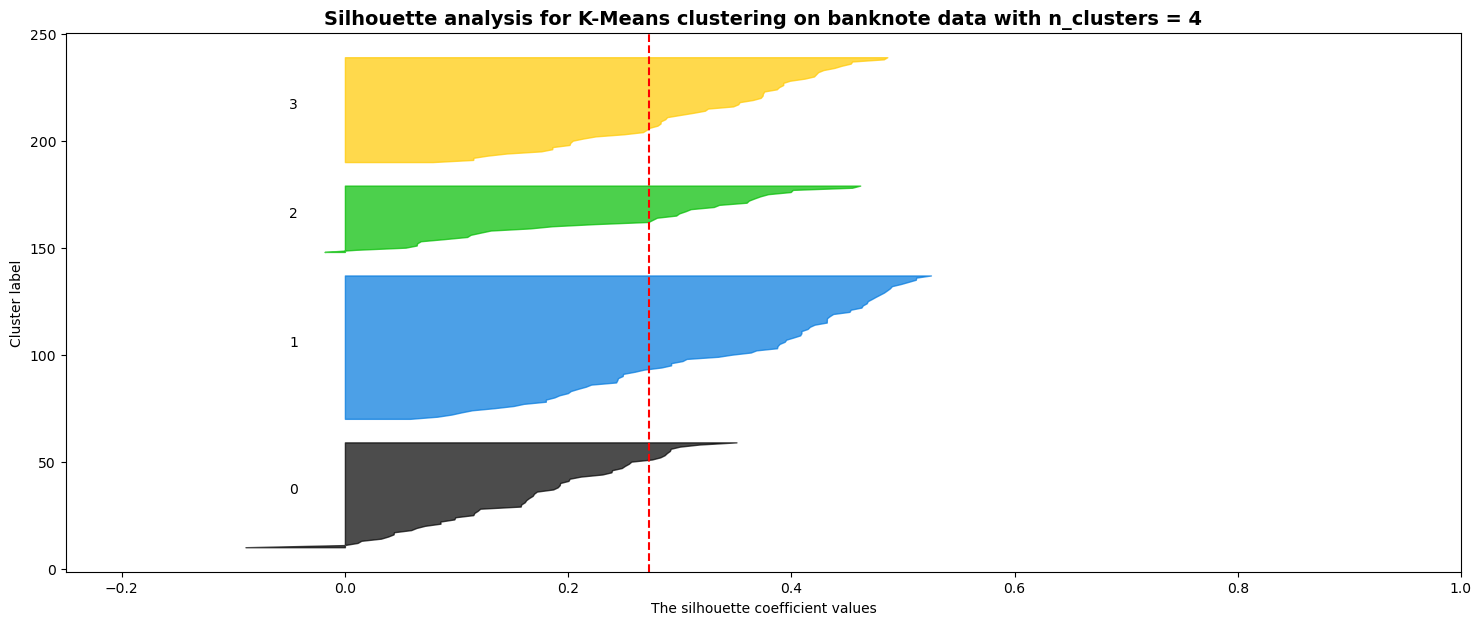

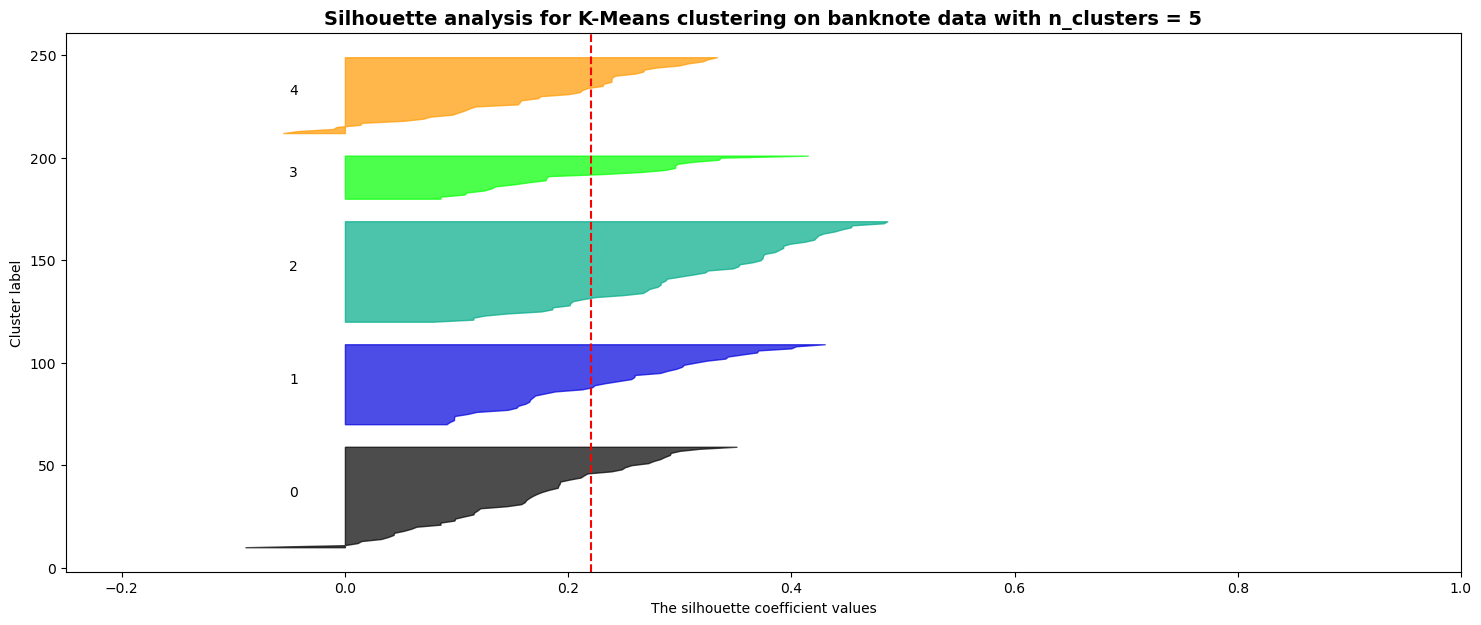

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm



range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(banknote_df_standardized)
    silhouette_avg_km = silhouette_score(banknote_df_standardized, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(banknote_df_standardized, cluster_labels_km)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])
    y_lower = 10    

    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for K-Means clustering on banknote data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.show()

k = 2 best fits the data, so we should use 2 clusters. This is because it has a higher silhouette score (close to 0.4), indicating that we have better cluster quality. Another reason we should use k = 2 is because it produces the most balanced clustered sizes, whereas the others do not. It also has very little silhouette scores below 0, which is good.

\newpage

8. Apply k-means clustering to find clusters of banknotes with $k$ you found in question (7). Set n_init to 20 to ensure multiple initial centroid seeds are tested. After clustering, calculate and report the number of observations within each identified cluster.

In [24]:
# Set the number of clusters to the optimal value found previously
k_optimal = 2

# Initialize the KMeans algorithm with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=20, random_state=42)

# Fit the algorithm to the standardized data
kmeans_optimal.fit(banknote_df_standardized)

# Get the cluster assignments
cluster_labels_optimal = kmeans_optimal.labels_

# Calculate and report the number of observations within each identified cluster
cluster_counts = pd.Series(cluster_labels_optimal).value_counts()
print(f"Number of observations in each cluster:\n{cluster_counts}")

Number of observations in each cluster:
1    108
0     92
Name: count, dtype: int64


\newpage

9. Since visualizing clusters with all variables in the dataset is not feasible, we will employ principal component analysis (PCA) to reduce the dimensionality of the banknote data, excluding the `Status` variable. Use the normalized data prepared in question (5) for this analysis. Determine the number of principal components to compute. Justify your choice of the number of components, considering factors such as explained variance and the scree plot.

In [30]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

In [31]:
# Fit PCA on the standardized data
pca.fit(banknote_df_standardized)

PCA()

In [32]:
banknote_df_standardized.shape

(200, 6)

In [33]:
# number of PCs
pca.components_.shape[0]

6

In [ ]:
# Let's put the PC loading into a data frame. 
pca_loadings = pd.DataFrame(
    pca.fit(banknote_df_standardized).components_.T,
    index=banknote_df_standardized.columns,  
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

In [36]:
pca_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6
Length,0.006987,0.815495,0.017681,0.574617,-0.058796,-0.031057
Left,-0.467758,0.341967,-0.103383,-0.394923,0.639496,0.297748
Right,-0.486679,0.252459,-0.123475,-0.430278,-0.614097,-0.349153
Bottom,-0.406758,-0.266229,-0.583538,0.403674,-0.215476,0.462354
Top,-0.367891,-0.091487,0.787571,0.110227,-0.219849,0.418968


In [37]:
# Principal component scores
pca.fit_transform(banknote_df_standardized).shape

(200, 6)

In [38]:
pc_scores = pd.DataFrame(
    pca.fit_transform(banknote_df_standardized), 
    index=banknote_df_standardized.index,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
    )
pc_scores.head(5)


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.747401,1.650828,-1.423761,-2.754865,0.003302,-0.603533
1,2.274318,-0.538793,-0.532648,-0.659005,-0.158569,-0.457688
2,2.277402,-0.107677,-0.717415,-0.341694,-0.455020,0.045443
3,2.283555,-0.087654,0.605634,-0.392809,-0.283623,0.055578
4,2.632128,0.039196,-3.196385,0.425081,-0.278199,-0.722072


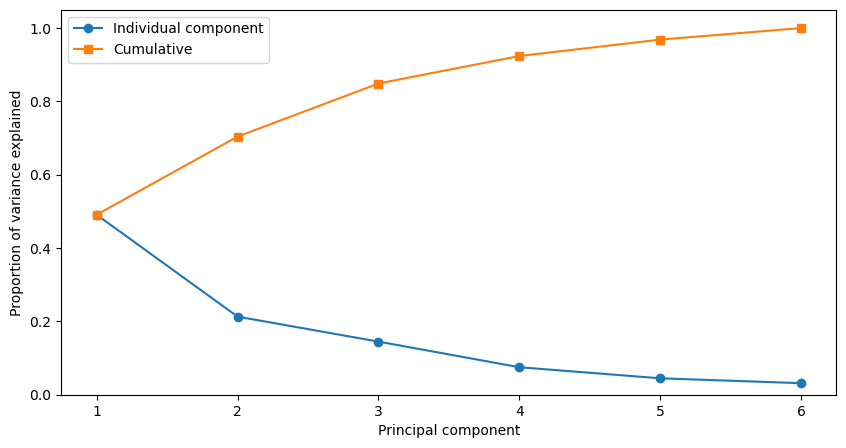

In [39]:
# Variation explained by PCs
num_components = pca.n_components_
pc_indices = np.arange(1, num_components + 1)

plt.figure(figsize=(10,5))

plt.plot(pc_indices, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(pc_indices, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal component')
plt.xlim(0.75, num_components + 0.25)
plt.ylim(0, 1.05)
plt.xticks(pc_indices)
plt.legend(loc=2)
plt.show()

Using the elbow rule, we select 2 principal components since the variance explained by the remaining PCs increases very slowly. The first two PCs together account for about 70% of the total variance in the data. Therefore, we choose the first two PCs for visualization, as our primary goal is to plot the PC scores and annotate cell types.

\newpage

10. Refer to the PCA obtained in question (9) to identify which variable has the most significant influence on the second principal component. Explain your rationale for identifying this variable.

In [81]:
# Identify the variable with the most significant influence on the second principal component
most_influential_variable_pc2 = pca_loadings['PC2'].abs().idxmax()
most_influential_value_pc2 = pca_loadings['PC2'].abs().max()

print(f"The variable with the most significant influence on PC2 is {most_influential_variable_pc2} with a loading of {most_influential_value_pc2:.4f}.")

The variable with the most significant influence on PC2 is Length with a loading of 0.8155.


The variable Length was identified as the most influential in PC2 since it has the highest absolute loading (0.8155). This means that it contributes the most to variance along this component. Since PCA loadings represent the importance of each variable in defining a principal component, this indicates that Length plays a key role in differentiating the data along PC2. This suggests that variations in Length have a significant impact the dataset’s structure, potentially impacting clustering or classification outcomes.

\newpage

11. Determine the proportion of the total variance in the original dataset that is explained by the first two principal components. Provide the Python code that calculates this proportion based on the PCA results obtained in question (9).

In [83]:
# Calculate the proportion of variance explained by the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_
proportion_variance_explained = explained_variance_ratio[0] + explained_variance_ratio[1]

print(f"The proportion of the total variance explained by the first two principal components is {proportion_variance_explained:.4f}")

The proportion of the total variance explained by the first two principal components is 0.7039


\newpage

12. Create a visualization of the k-means cluster assignments from question (8), using the first two principal components as the axes. This visualization will help illustrate how the clusters are distributed in the reduced-dimensional space.

/opt/anaconda3/envs/stats3da3w2025/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


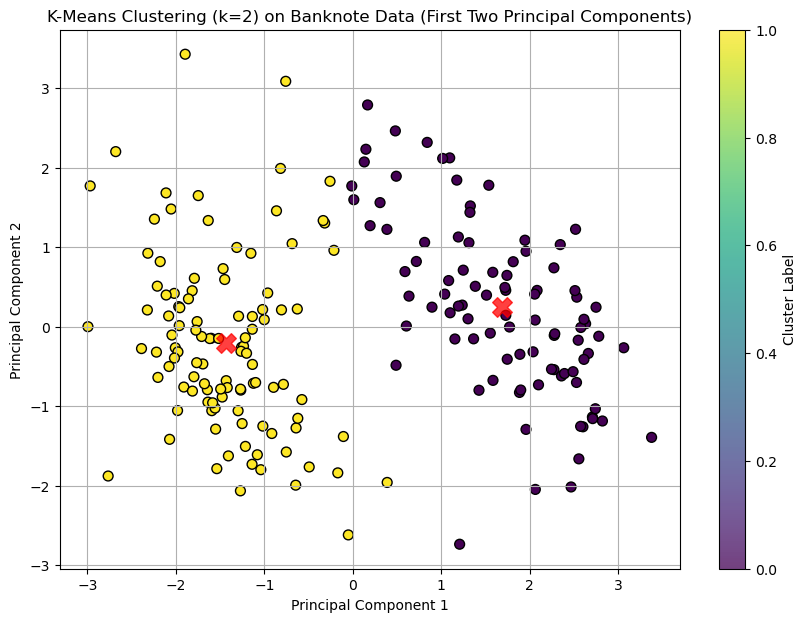

In [85]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 7))

# Scatter plot with cluster assignments
plt.scatter(pc_scores['PC1'], pc_scores['PC2'], c=cluster_labels_optimal, cmap='viridis',
            marker='o', edgecolor='k', s=50)

# Add cluster centers to the plot
centers = kmeans_optimal.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (k=2) on Banknote Data (First Two Principal Components)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

\newpage

13. Compare the true labels, represented by the `Status` variable saved in question (1), with the k-means cluster assignments determined in question (8). Use the adjusted Rand index to quantify the similarity between the true labels and the clustering assignments. Provide commentary on the implications of the results obtained from this comparison.


In [58]:
from sklearn.metrics import rand_score

# Calculate the Rand Index
rand_index = rand_score(status, cluster_labels_optimal)

print(f"The Rand Index between the true labels and the k-means cluster assignments is {rand_index:.4f}")

The Rand Index between the true labels and the k-means cluster assignments is 0.9228


In [57]:
from sklearn.metrics import adjusted_rand_score

# Calculate the adjusted Rand index
ari_score = adjusted_rand_score(status, cluster_labels_optimal)

print(f"The adjusted Rand index between the true labels and the k-means cluster assignments is {ari_score:.4f}")

The adjusted Rand index between the true labels and the k-means cluster assignments is 0.8456


Since the ARI is close to 1, the k-means clustering has captured the true structure of the data successfully and the clustering aligns well with the genuine and counterfeit banknotes. This ARI indicates that we have a strong agreement between the true labels and the k-means cluster assignments.

\newpage

## References:

Flury, B. and Riedwyl, H. (1988). Multivariate Statistics: A practical approach. London: Chapman & Hall, Tables 1.1 and 1.2, pp. 5-8.

(I used GitHub Copilot for assistance)